# 无监督机器学习
无监督机器学习是一种基于没有注释但有额外信息（如需要区分的类别数量）来配置（学习）计算模型参数的技术。这类算法中的许多都执行数据_聚类_。

另请参阅
* [无监督学习（维基百科）](https://en.wikipedia.org/wiki/Unsupervised_learning)
* [scikit-learn的聚类算法](https://scikit-learn.org/stable/modules/clustering.html)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# local import; this library is located in the same folder as the notebook
from data_generator import generate_biomodal_2d_data

我们演示监督机器学习的起点是一对双峰分布的测量。在以下数据集中，面积较大的物体通常也更加细长。

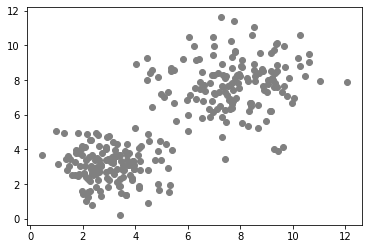

In [2]:
data = generate_biomodal_2d_data()

plt.scatter(data[:, 0], data[:, 1], c='grey')

在无监督机器学习算法的情况下，我们需要为算法提供额外信息，以便它能够有意义地将数据点分离（_聚类_）到不同区域。我们提供的信息取决于算法和数据的分布。通常，我们根据数据选择算法。在上面的例子中，我们可以清楚地看到两个集群，这是一个[双峰分布](https://en.wikipedia.org/wiki/Multimodal_distribution)。在这种情况下，我们可以指定要区分的类别数量：

In [3]:
number_of_classes = 2

## 初始化k均值聚类
[k均值聚类](https://en.wikipedia.org/wiki/K-means_clustering)是一种将数据点聚类成`k`个簇的算法，使得所有数据点都被分配到最近的簇中心。

scikit-learn中的聚类算法通常有一个`fit()`函数，该函数消耗如上所给的`data`集。

In [4]:
classifier = KMeans(n_clusters=number_of_classes)
classifier.fit(data)

KMeans(n_clusters=2)

## 预测
模型训练（或_拟合_）后，我们可以将其应用于我们的数据，以获取数据点属于哪个簇的预测。簇的索引从0开始。因此，如果我们要区分两个簇，簇索引为0和1：

In [5]:
prediction = classifier.predict(data)
prediction

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1], d

然后我们可以用颜色可视化所有预测的类别。

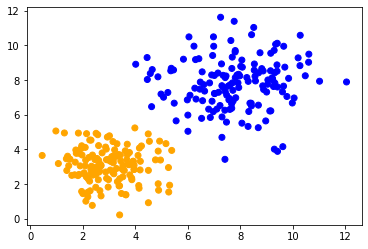

In [6]:
colors = ['orange', 'blue']
predicted_colors = [colors[i] for i in prediction]

plt.scatter(data[:, 0], data[:, 1], c=predicted_colors)

## 练习
训练一个[高斯混合模型]()并可视化其预测。

In [7]:
from sklearn.mixture import GaussianMixture

classifier = GaussianMixture(n_components=2)